Import Libraries

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Load Dataset

In [177]:
df = pd.read_csv("Wholesale customers data.csv")
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

Data Preprocesssing

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [179]:
df.isna().sum()   #no null values

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [180]:
df.describe()

Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.250000  
50%     1526.000000        816.500000    965.500000  
75%     3554.250000       3922.000000   1820.250000  
max    60869.000000      40827.000000  47943.000000

In [181]:
df.duplicated().sum()  # no duplicates

np.int64(0)

In [182]:
df.nunique()

Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64

In [183]:
df['Channel'].value_counts()  # 1 -> Horeca , 2 -> Retail

Channel
1    298
2    142
Name: count, dtype: int64

In [184]:
df['Region'].value_counts()  # 1 -> Lisbon , 2 -> Oporto , 3 -> Other

Region
3    316
1     77
2     47
Name: count, dtype: int64

Feature Selection


In [185]:
channel = df['Channel'].copy()
df.drop(axis=1,columns=['Channel','Region'],inplace=True)
df

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0    12669   9656     7561     214              2674        1338
1     7057   9810     9568    1762              3293        1776
2     6353   8808     7684    2405              3516        7844
3    13265   1196     4221    6404               507        1788
4    22615   5410     7198    3915              1777        5185
..     ...    ...      ...     ...               ...         ...
435  29703  12051    16027   13135               182        2204
436  39228   1431      764    4510                93        2346
437  14531  15488    30243     437             14841        1867
438  10290   1981     2232    1038               168        2125
439   2787   1698     2510      65               477          52

[440 rows x 6 columns]

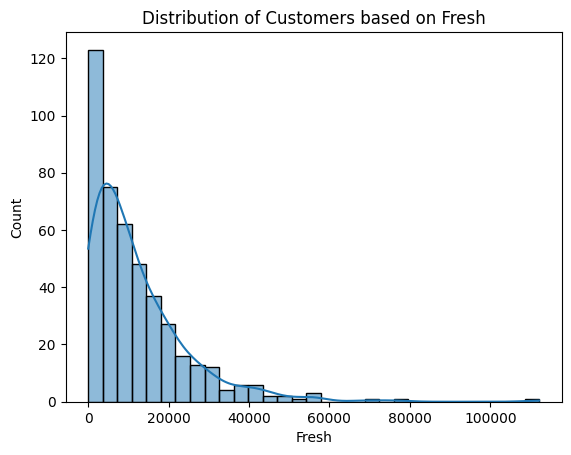

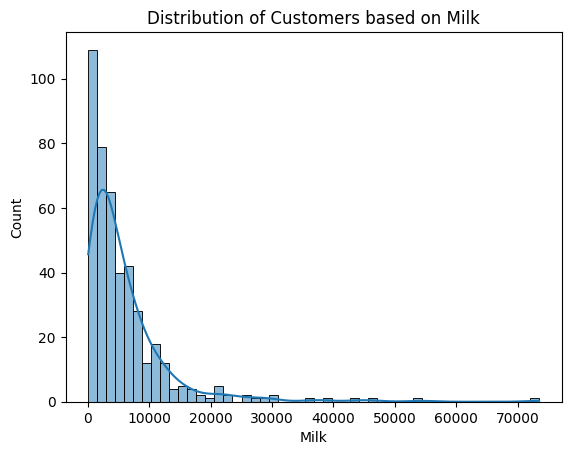

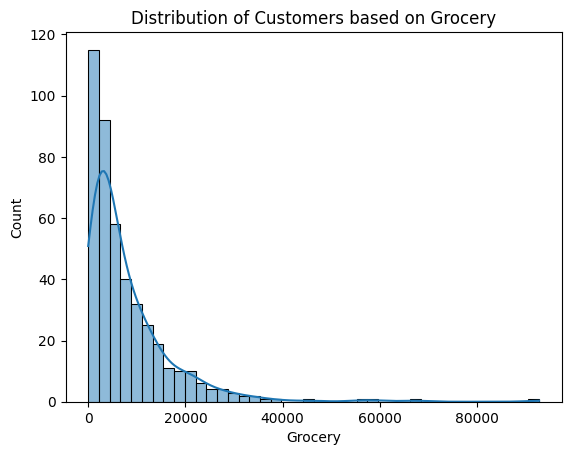

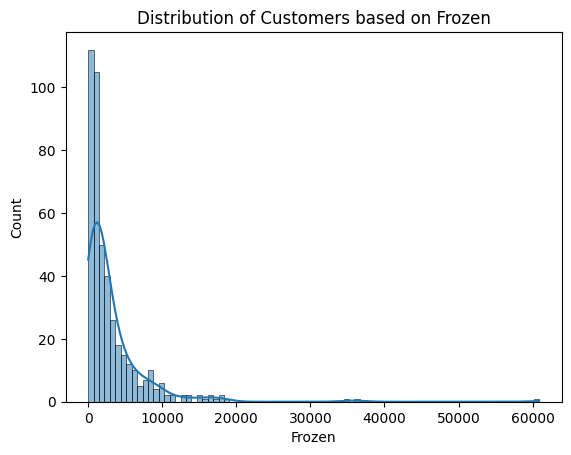

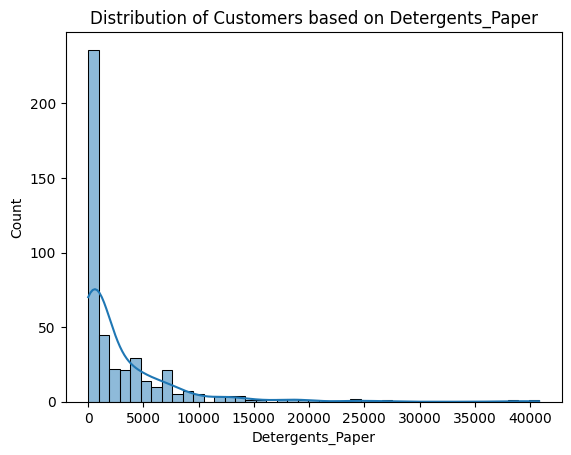

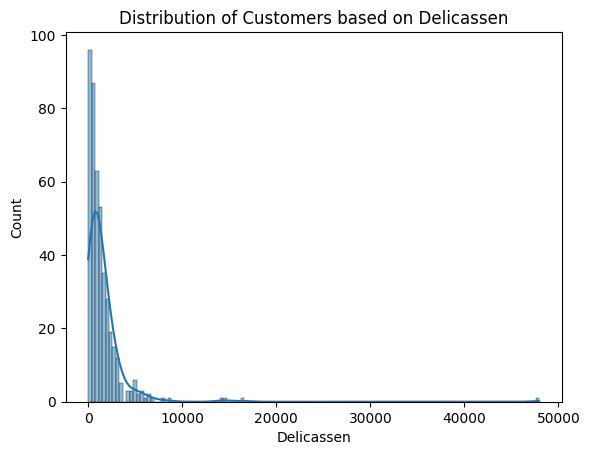

In [186]:
for col in df:
    sns.histplot(data = df,x=col,kde=True)
    plt.title(f'Distribution of Customers based on {col}')
    plt.show()

visualization with outliers

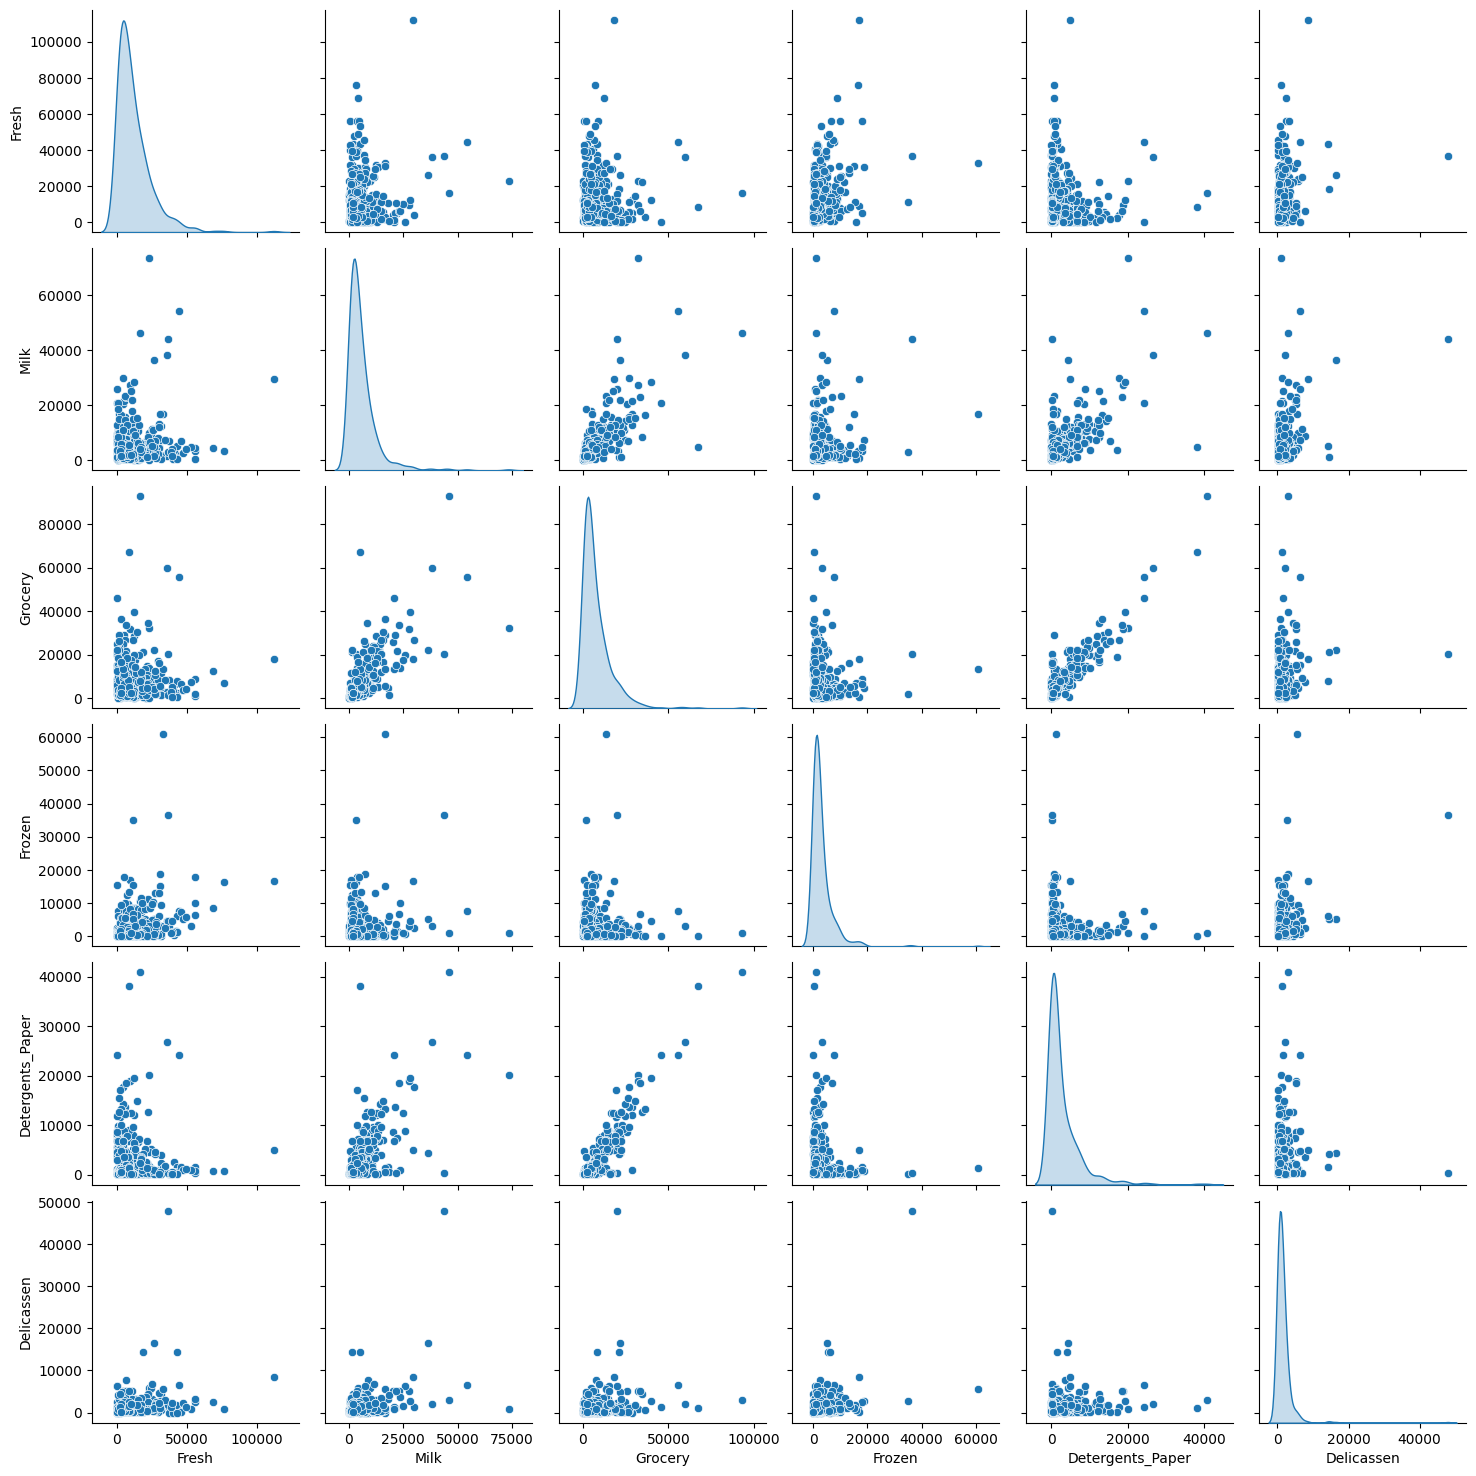

In [187]:
sns.pairplot(df,kind='scatter',diag_kind='kde')
plt.show()

Handel Outliers

In [188]:
for col in df:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lowerBound = Q1 - IQR *1.5
    upperBound = Q3 + IQR * 1.5
    
    df[col] = np.where(df[col] > upperBound, upperBound, 
                       np.where(df[col] < lowerBound, upperBound, df[col]))   # replace outlier with upperbound

            


Visualization without Outliers

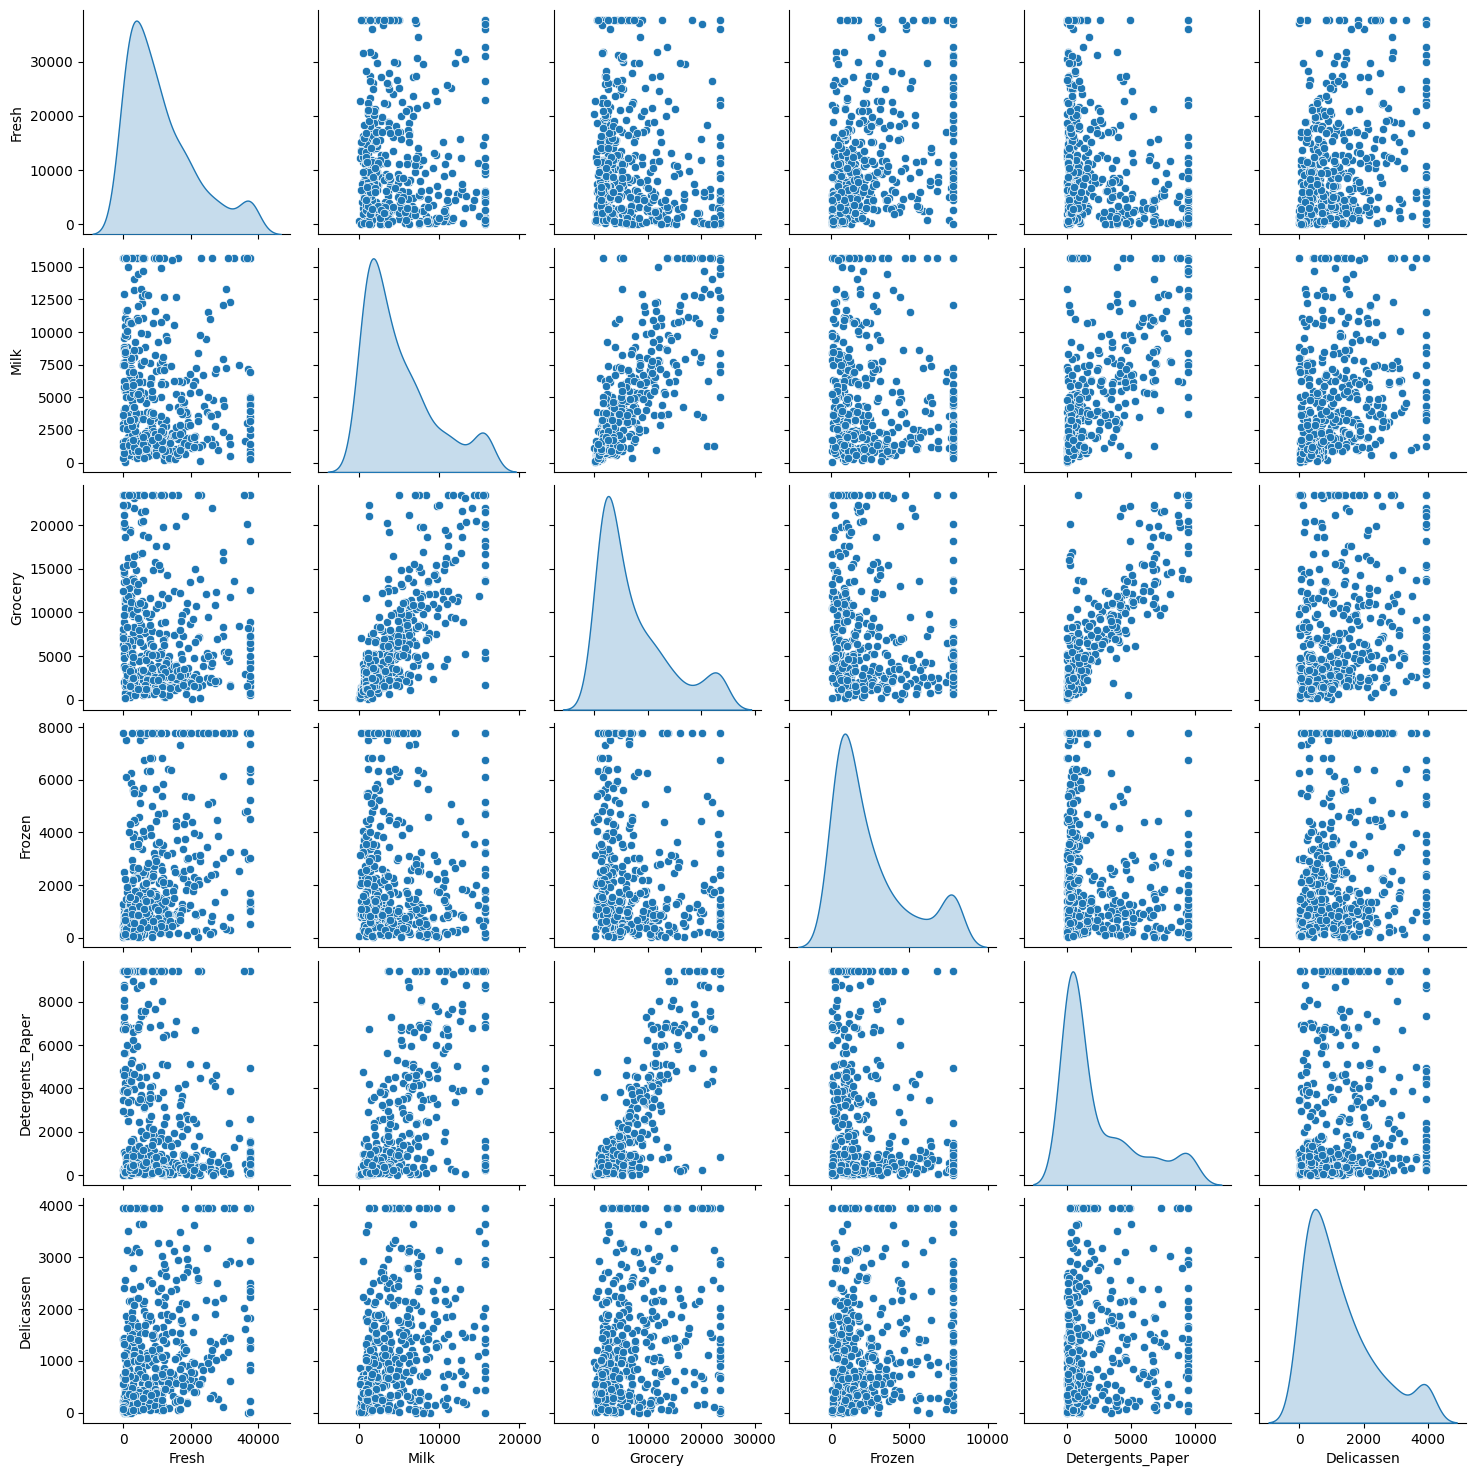

In [189]:
sns.pairplot(df,kind='scatter',diag_kind='kde')
plt.show()

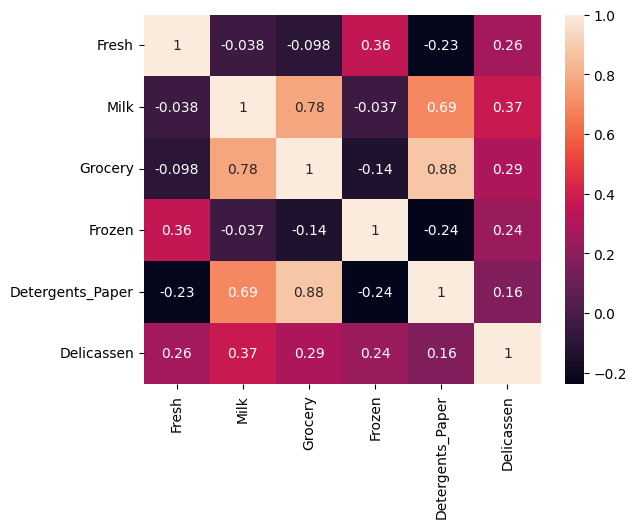

In [190]:
sns.heatmap(df.corr(),annot=True)
plt.show()

Modeling

Normalization

In [191]:

minmax_scaler = MinMaxScaler()
df_scaled = pd.DataFrame(minmax_scaler.fit_transform(df),columns=df.columns)
df_scaled

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0    0.336506  0.614616  0.322897  0.024396          0.283640    0.339241
1    0.187408  0.624475  0.408641  0.224209          0.349373    0.450543
2    0.168705  0.560331  0.328151  0.307206          0.373054    1.000000
3    0.352340  0.073042  0.180203  0.823389          0.053521    0.453593
4    0.600748  0.342805  0.307388  0.502114          0.188385    1.000000
..        ...       ...       ...       ...               ...         ...
435  0.789059  0.767934  0.684585  1.000000          0.019008    0.559304
436  1.000000  0.088086  0.032512  0.578915          0.009557    0.595388
437  0.385975  0.987957  1.000000  0.053180          1.000000    0.473667
438  0.273301  0.123295  0.095228  0.130756          0.017522    0.539229
439  0.073964  0.105178  0.107105  0.005163          0.050335    0.012452

[440 rows x 6 columns]

K-Means Clustering

Elbow Method

In [192]:
WCSS=[]
k_range = range(1,11)
for k in k_range:
    kmeans = KMeans(n_clusters=k,init='k-means++',random_state=42)
    kmeans.fit(df_scaled)
    WCSS.append(kmeans.inertia_)

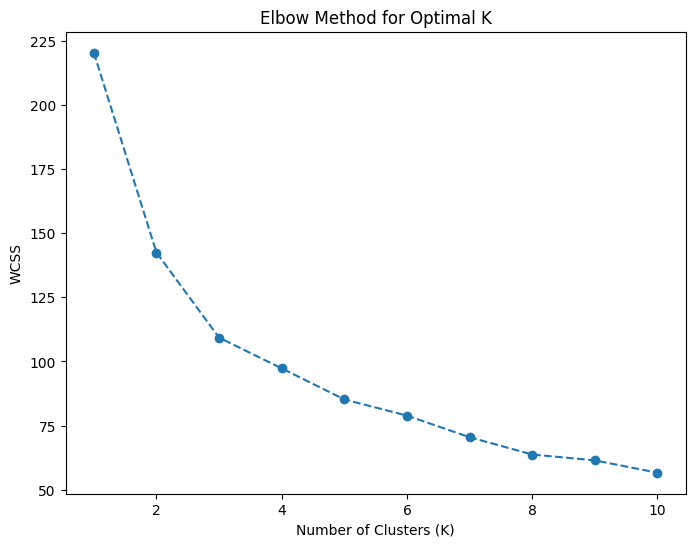

In [193]:
plt.figure(figsize=(8,6))
plt.plot(k_range,WCSS,marker='o',linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()


In [194]:
optimal_k=5
kmeans = KMeans(n_clusters=optimal_k,init='k-means++',random_state=42)
kmeans_clusters = kmeans.fit_predict(df_scaled)
df['cluster'] = kmeans_clusters
df_scaled['cluster'] = kmeans_clusters
df      #original data

Fresh     Milk    Grocery   Frozen  Detergents_Paper  Delicassen  \
0    12669.00   9656.0   7561.000   214.00          2674.000     1338.00   
1     7057.00   9810.0   9568.000  1762.00          3293.000     1776.00   
2     6353.00   8808.0   7684.000  2405.00          3516.000     3938.25   
3    13265.00   1196.0   4221.000  6404.00           507.000     1788.00   
4    22615.00   5410.0   7198.000  3915.00          1777.000     3938.25   
..        ...      ...        ...      ...               ...         ...   
435  29703.00  12051.0  16027.000  7772.25           182.000     2204.00   
436  37642.75   1431.0    764.000  4510.00            93.000     2346.00   
437  14531.00  15488.0  23409.875   437.00          9419.875     1867.00   
438  10290.00   1981.0   2232.000  1038.00           168.000     2125.00   
439   2787.00   1698.0   2510.000    65.00           477.000       52.00   

     cluster  
0          0  
1          0  
2          3  
3          1  
4          3  
..       ...  
435        3  
436        1  
437        4  
438        2  
439        2  

[440 rows x 7 columns]

clustering original data

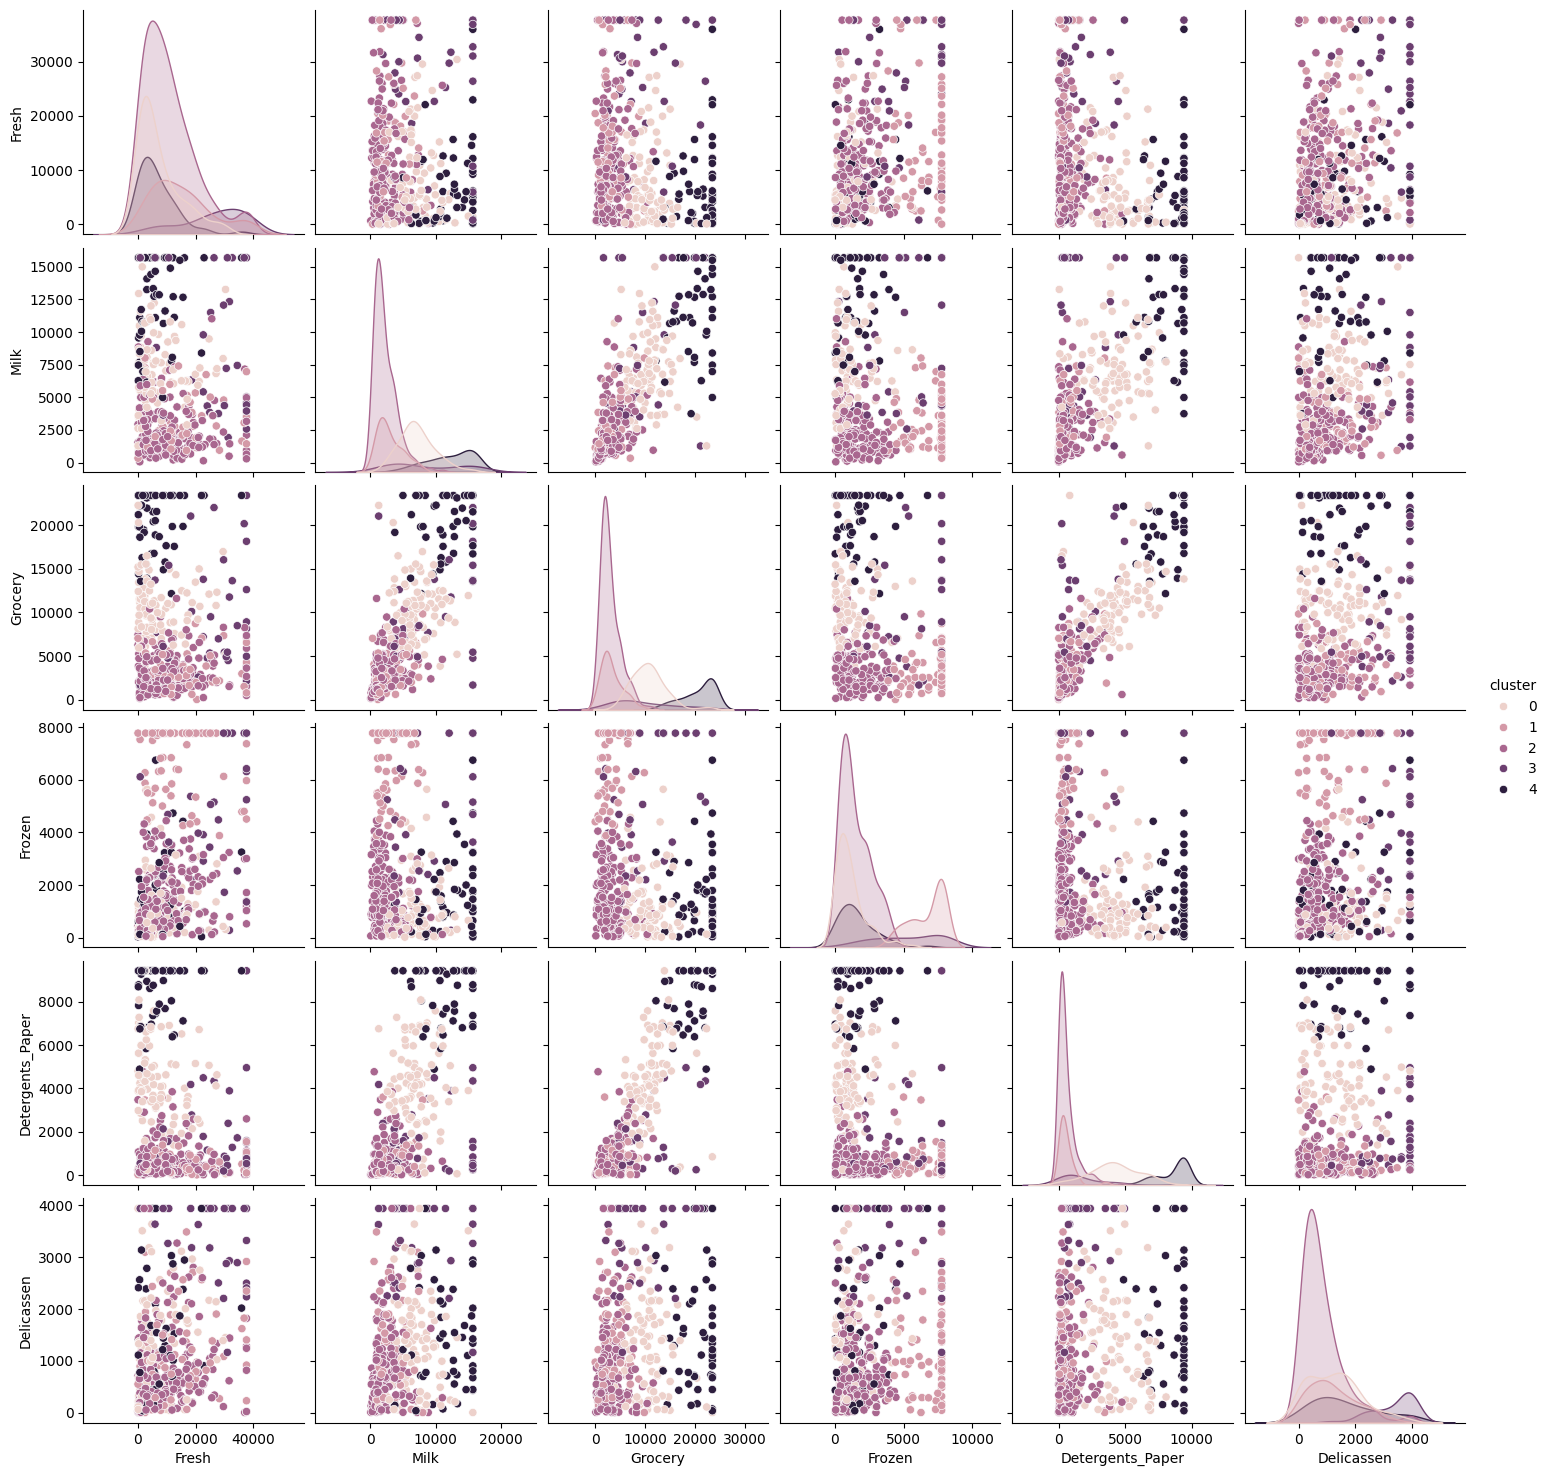

In [195]:
sns.pairplot(df,kind='scatter',hue='cluster',diag_kind='kde')
plt.show()

clustering scalled data

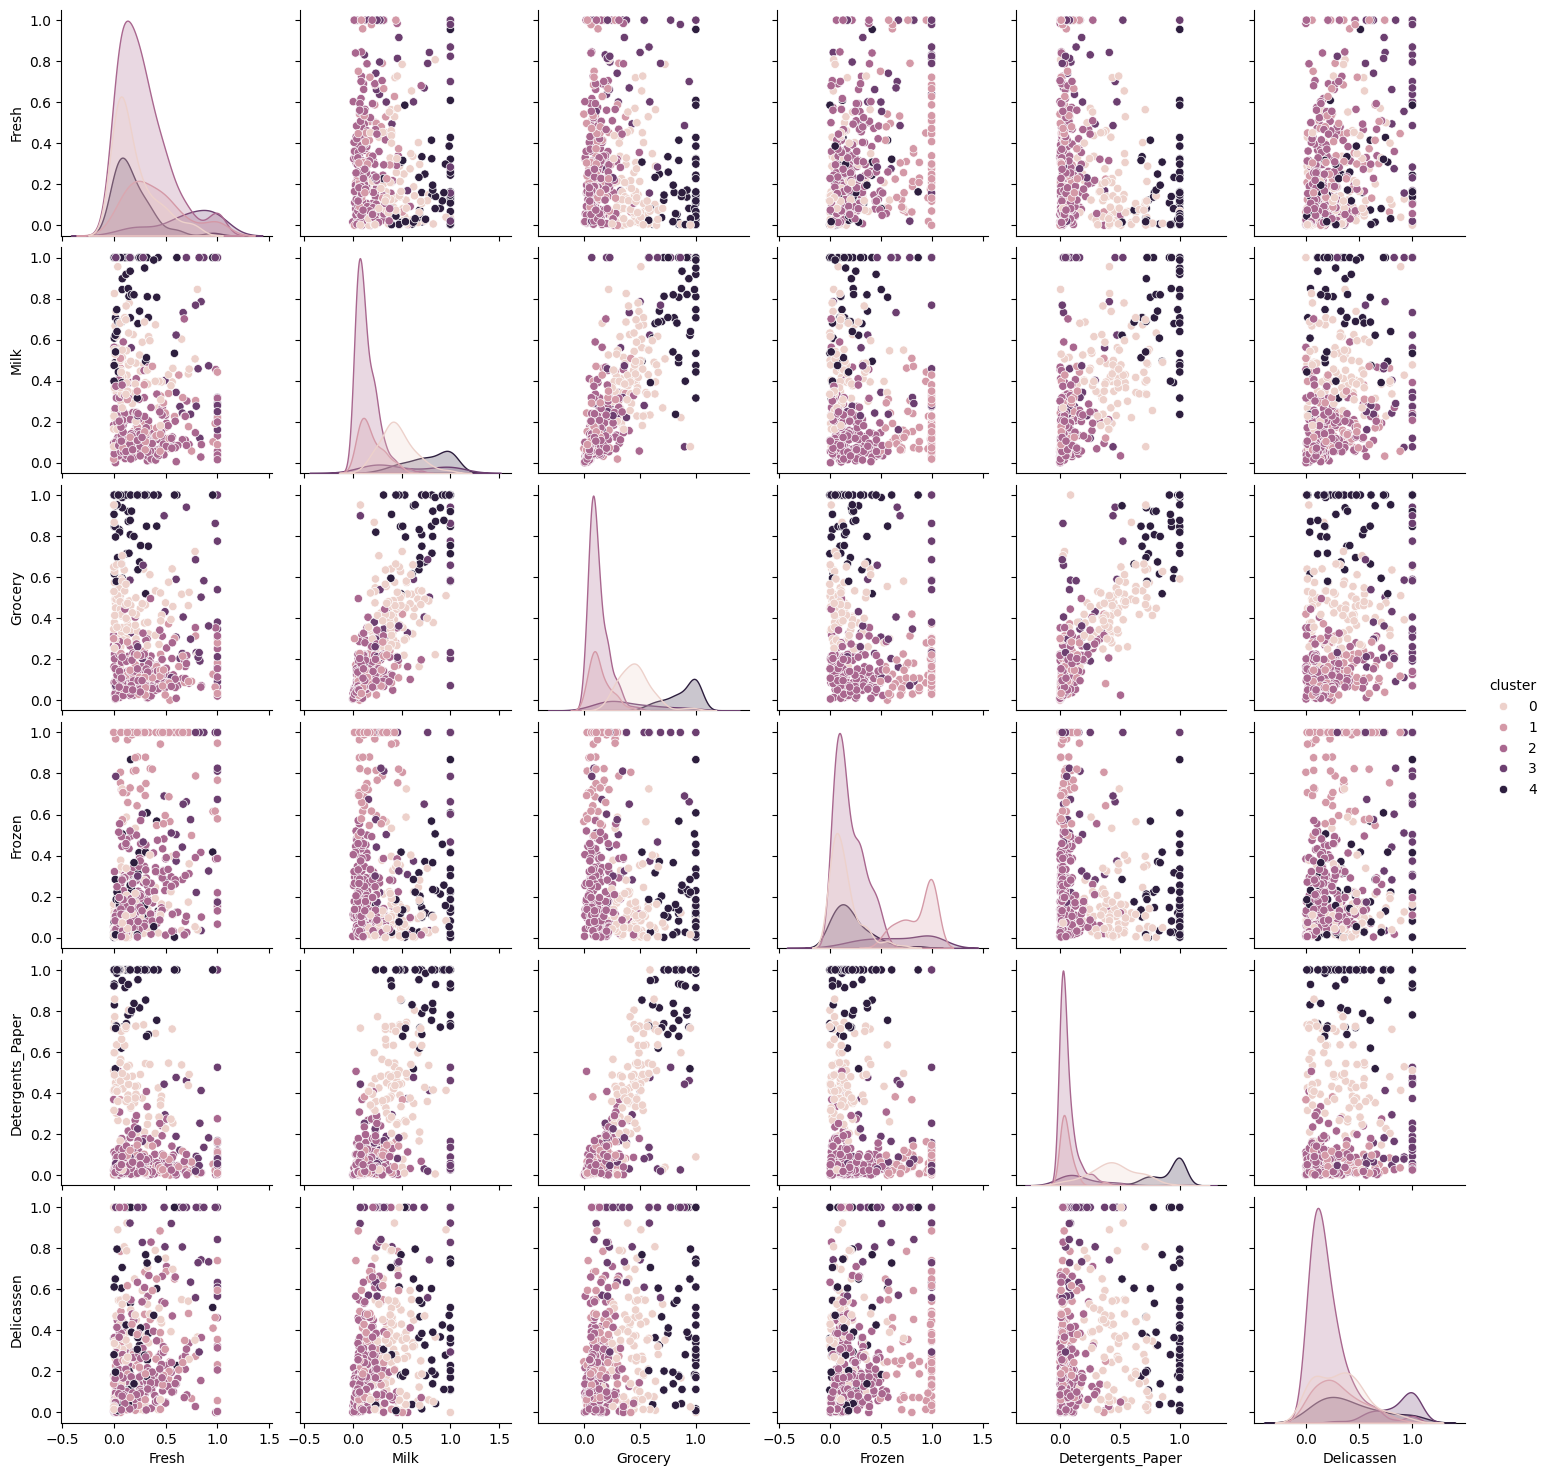

In [196]:
sns.pairplot(df_scaled,kind='scatter',hue='cluster',diag_kind='kde')
plt.show()

In [197]:
silhouette_avg = silhouette_score(df_scaled, kmeans_clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6006225393350462


visualize centroid points

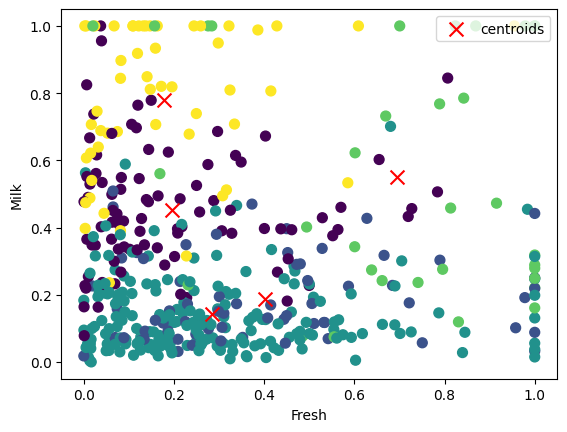

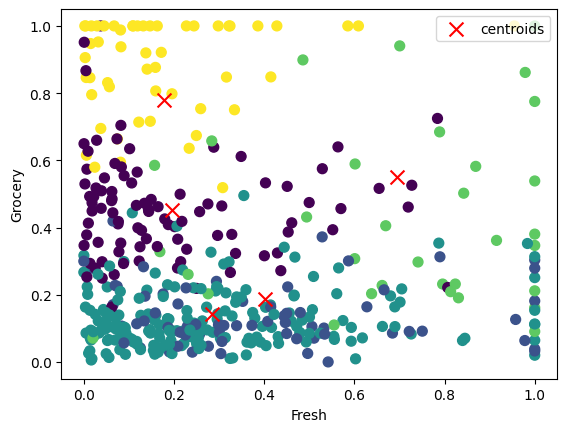

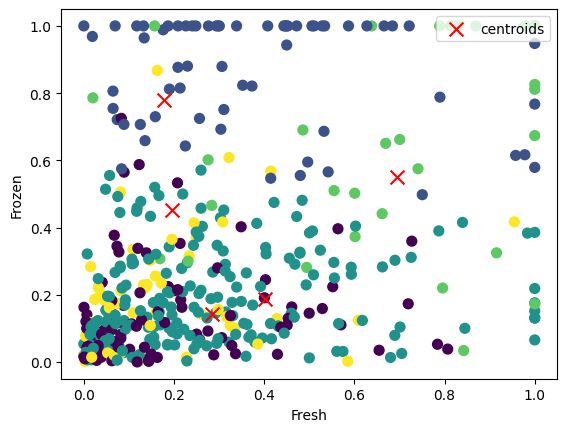

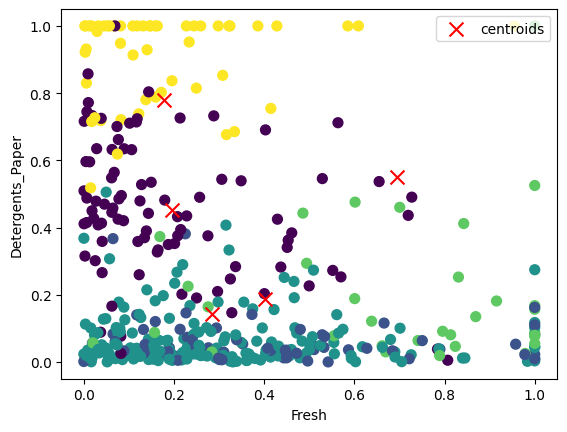

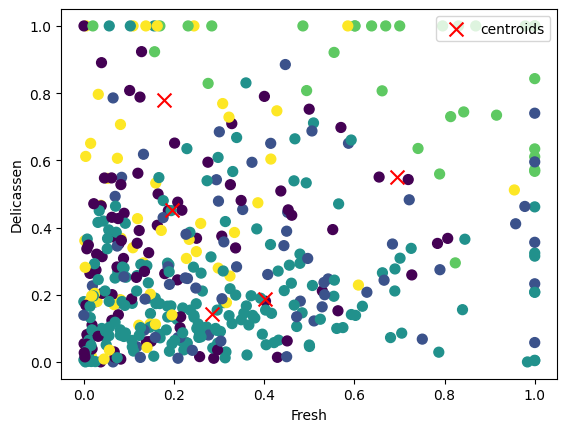

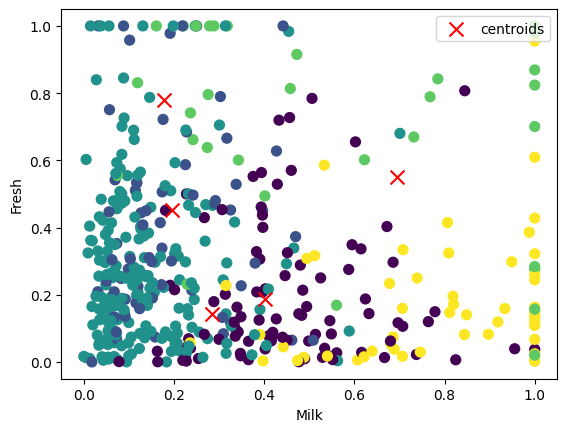

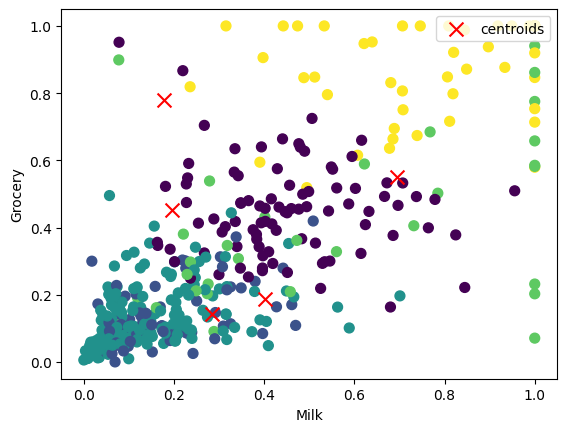

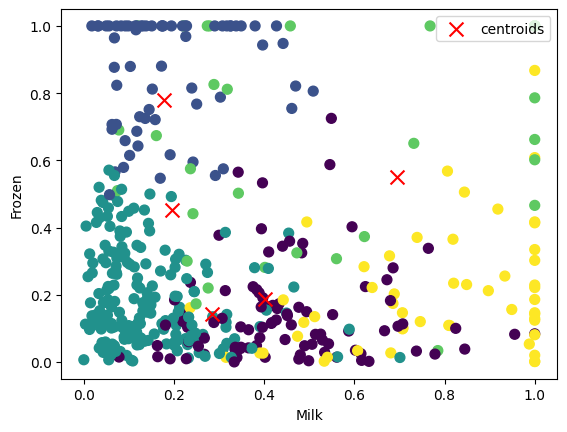

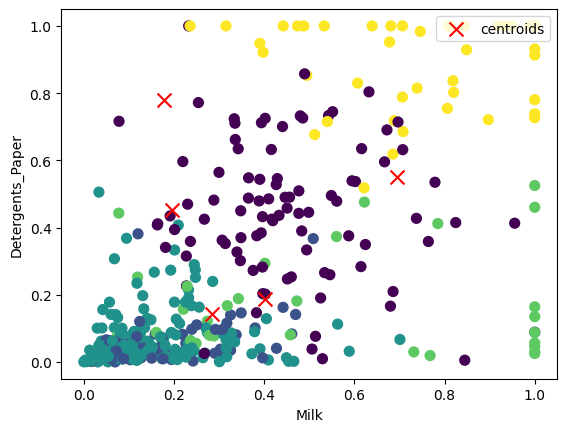

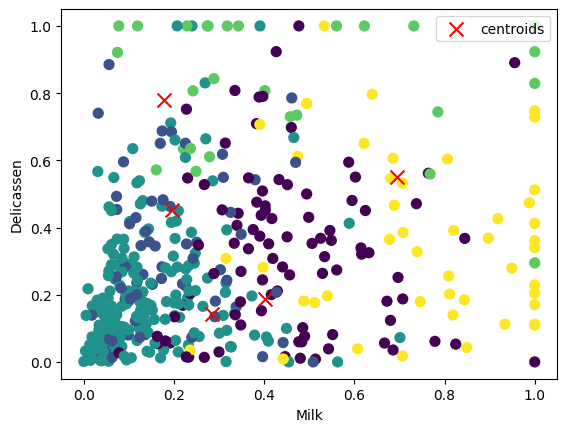

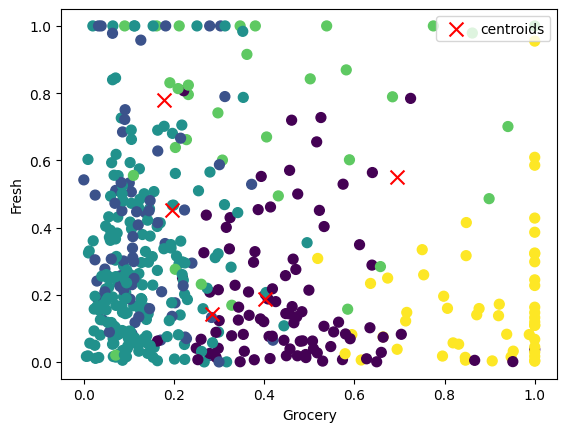

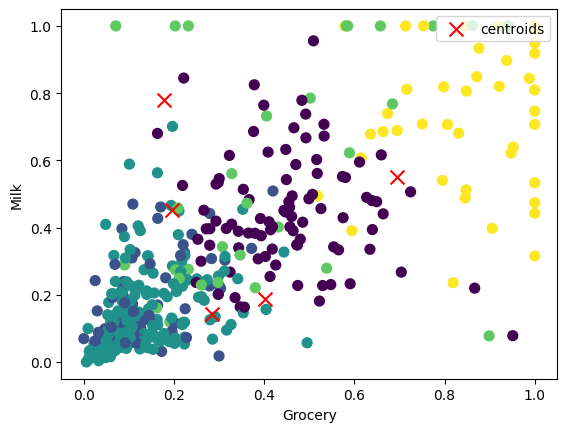

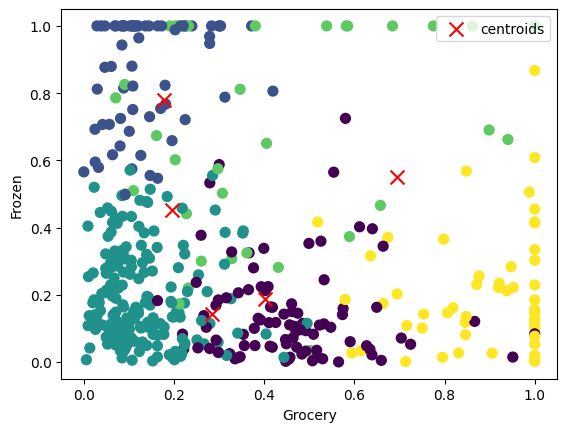

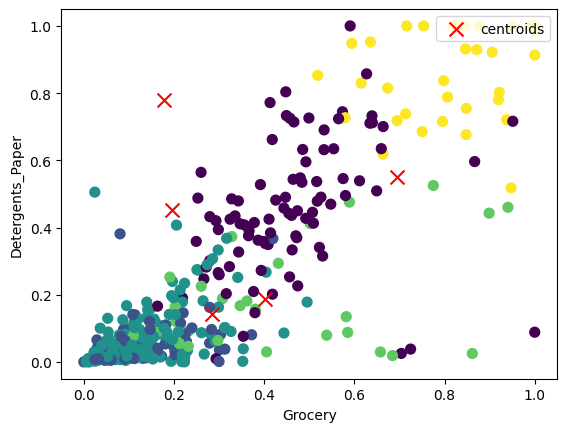

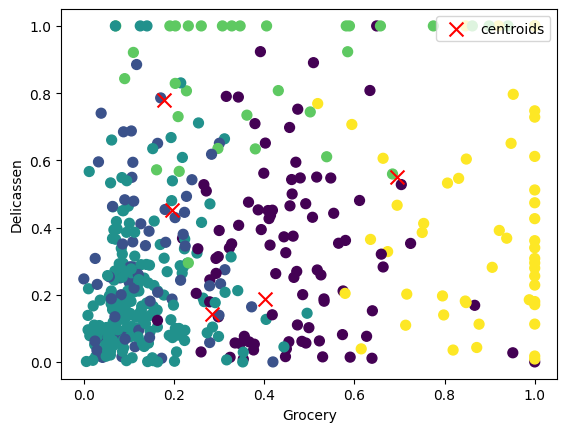

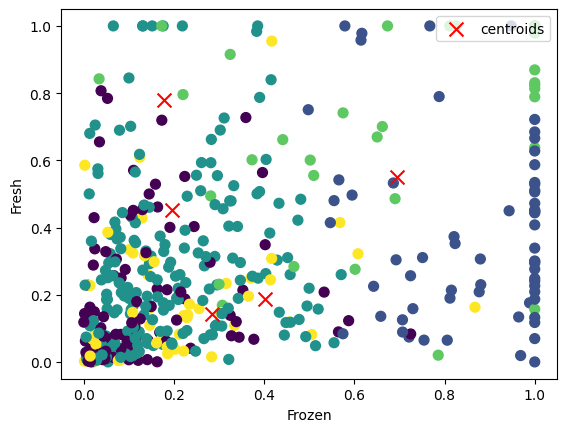

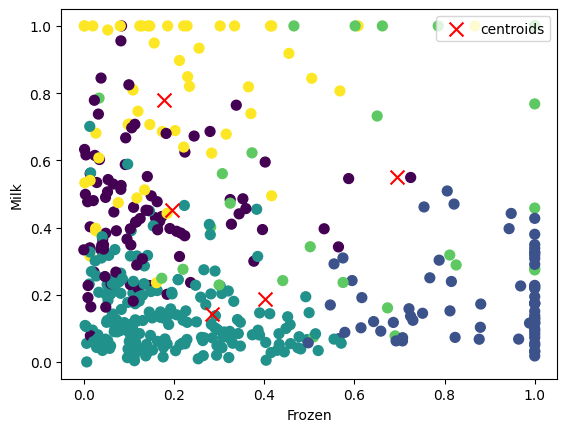

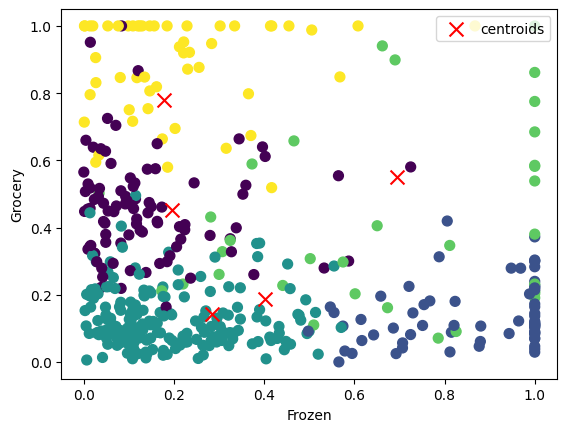

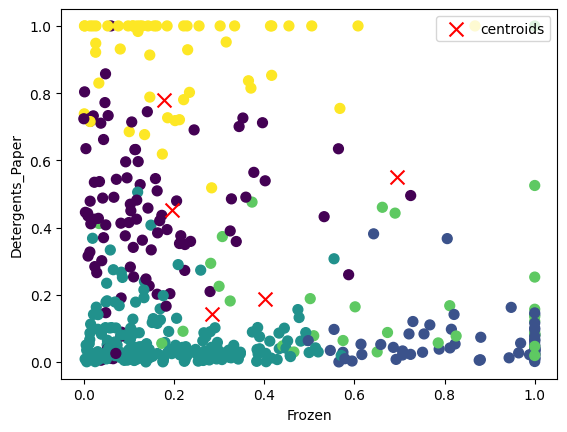

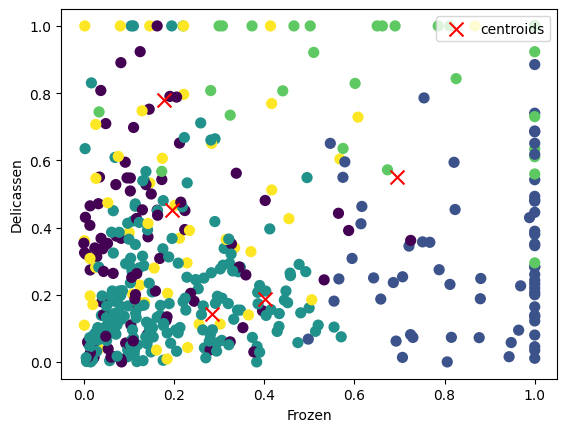

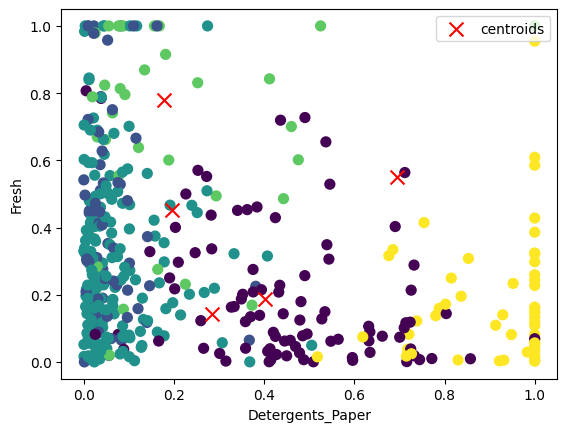

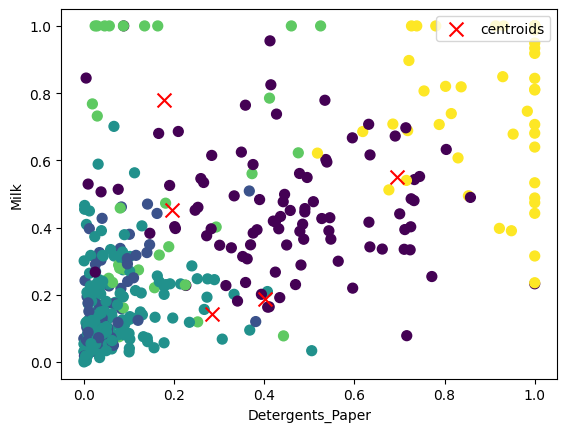

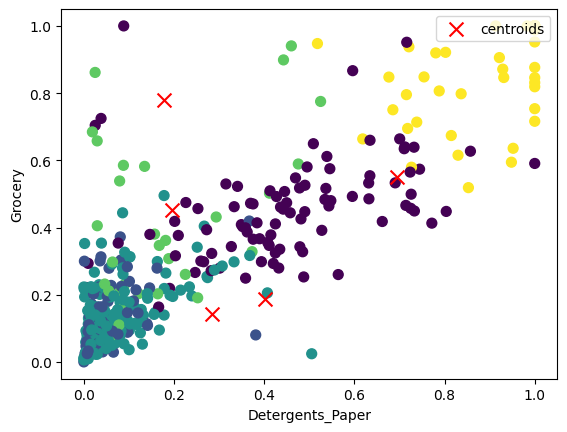

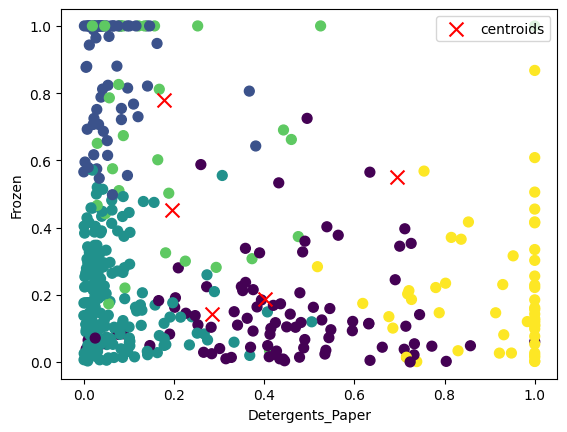

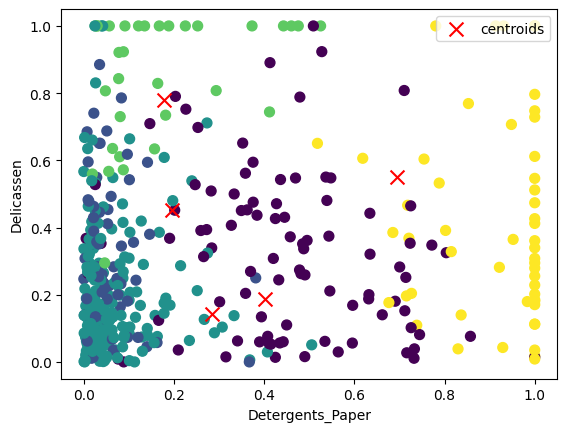

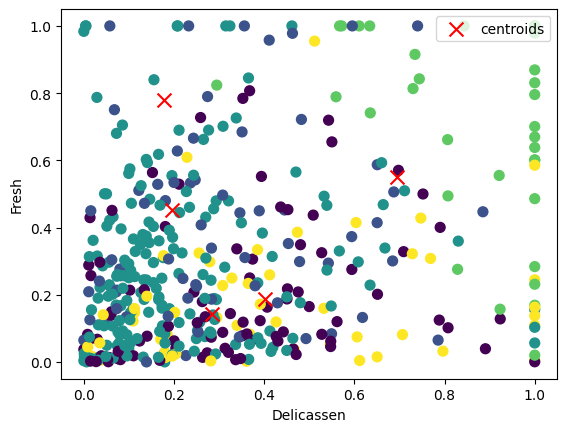

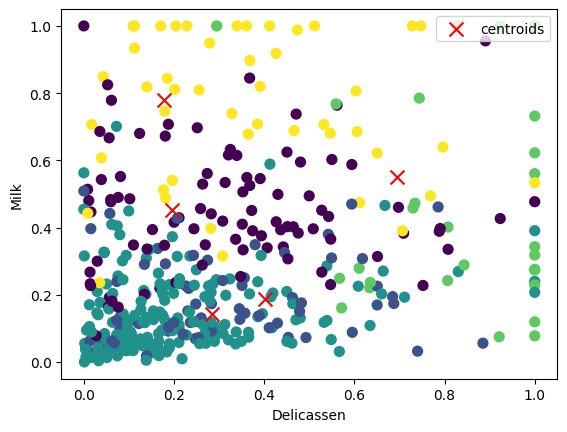

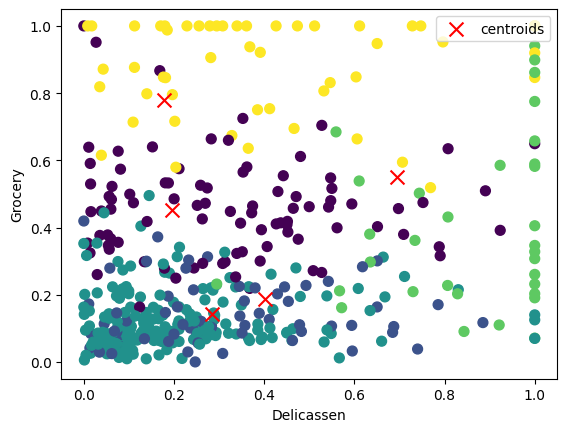

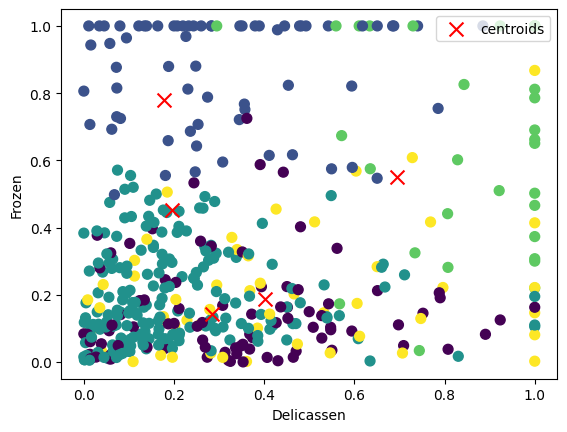

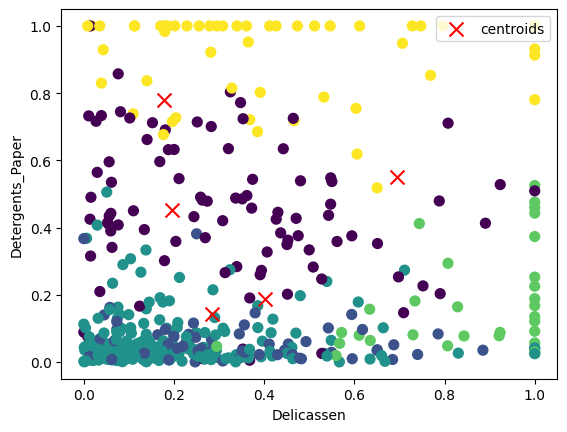

In [198]:

for ftr in df_scaled:
    for ftr2 in df_scaled :
        if ftr != ftr2 and ftr !='cluster' and ftr2 !='cluster':
            plt.scatter(df_scaled[ftr],df_scaled[ftr2],c=kmeans_clusters,s=50)
            plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='x',s=100,c='red',label='centroids')
            plt.xlabel(f'{ftr}')
            plt.ylabel(f'{ftr2}')
            plt.legend(loc='upper right')
            plt.show()



Hierarchical Clustering

import libraries

In [199]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

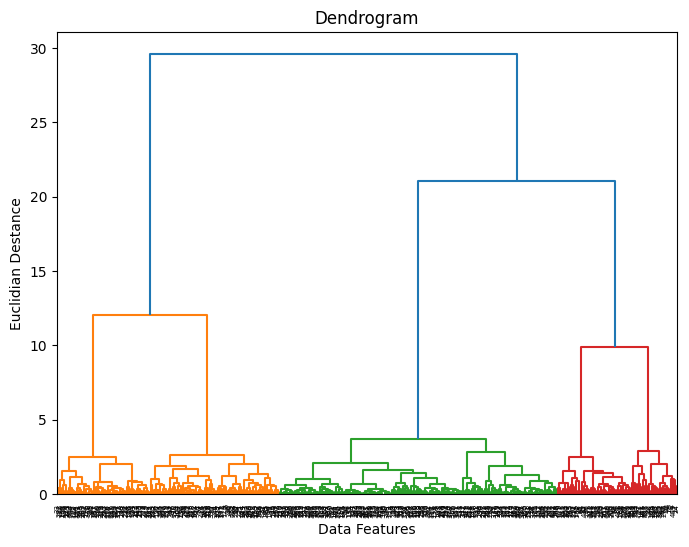

In [200]:
plt.figure(figsize=(8,6))
dindrogram = sch.dendrogram(sch.linkage(df_scaled,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Features')
plt.ylabel('Euclidian Destance')
plt.show()

In [201]:
num_clusters=3

agglom_clustering = AgglomerativeClustering(n_clusters=num_clusters,linkage='ward')
clusters_H = agglom_clustering.fit_predict(df_scaled)


In [202]:
df_scaled['clusters_H'] = clusters_H
df_scaled.head()

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen  \
0  0.336506  0.614616  0.322897  0.024396          0.283640    0.339241   
1  0.187408  0.624475  0.408641  0.224209          0.349373    0.450543   
2  0.168705  0.560331  0.328151  0.307206          0.373054    1.000000   
3  0.352340  0.073042  0.180203  0.823389          0.053521    0.453593   
4  0.600748  0.342805  0.307388  0.502114          0.188385    1.000000   

   cluster  clusters_H  
0        0           0  
1        0           0  
2        3           1  
3        1           0  
4        3           1

In [203]:
df_scaled['clusters_H'].value_counts()

clusters_H
2    197
0    158
1     85
Name: count, dtype: int64

In [204]:
silhouette_avg = silhouette_score(df_scaled, clusters_H)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6647445602271905


In [205]:
cluster_labels = {0: 'Cluster A', 1: 'Cluster B', 2: 'Cluster C'} 
df_scaled['clusters_H'] = df_scaled['clusters_H'].map(cluster_labels)

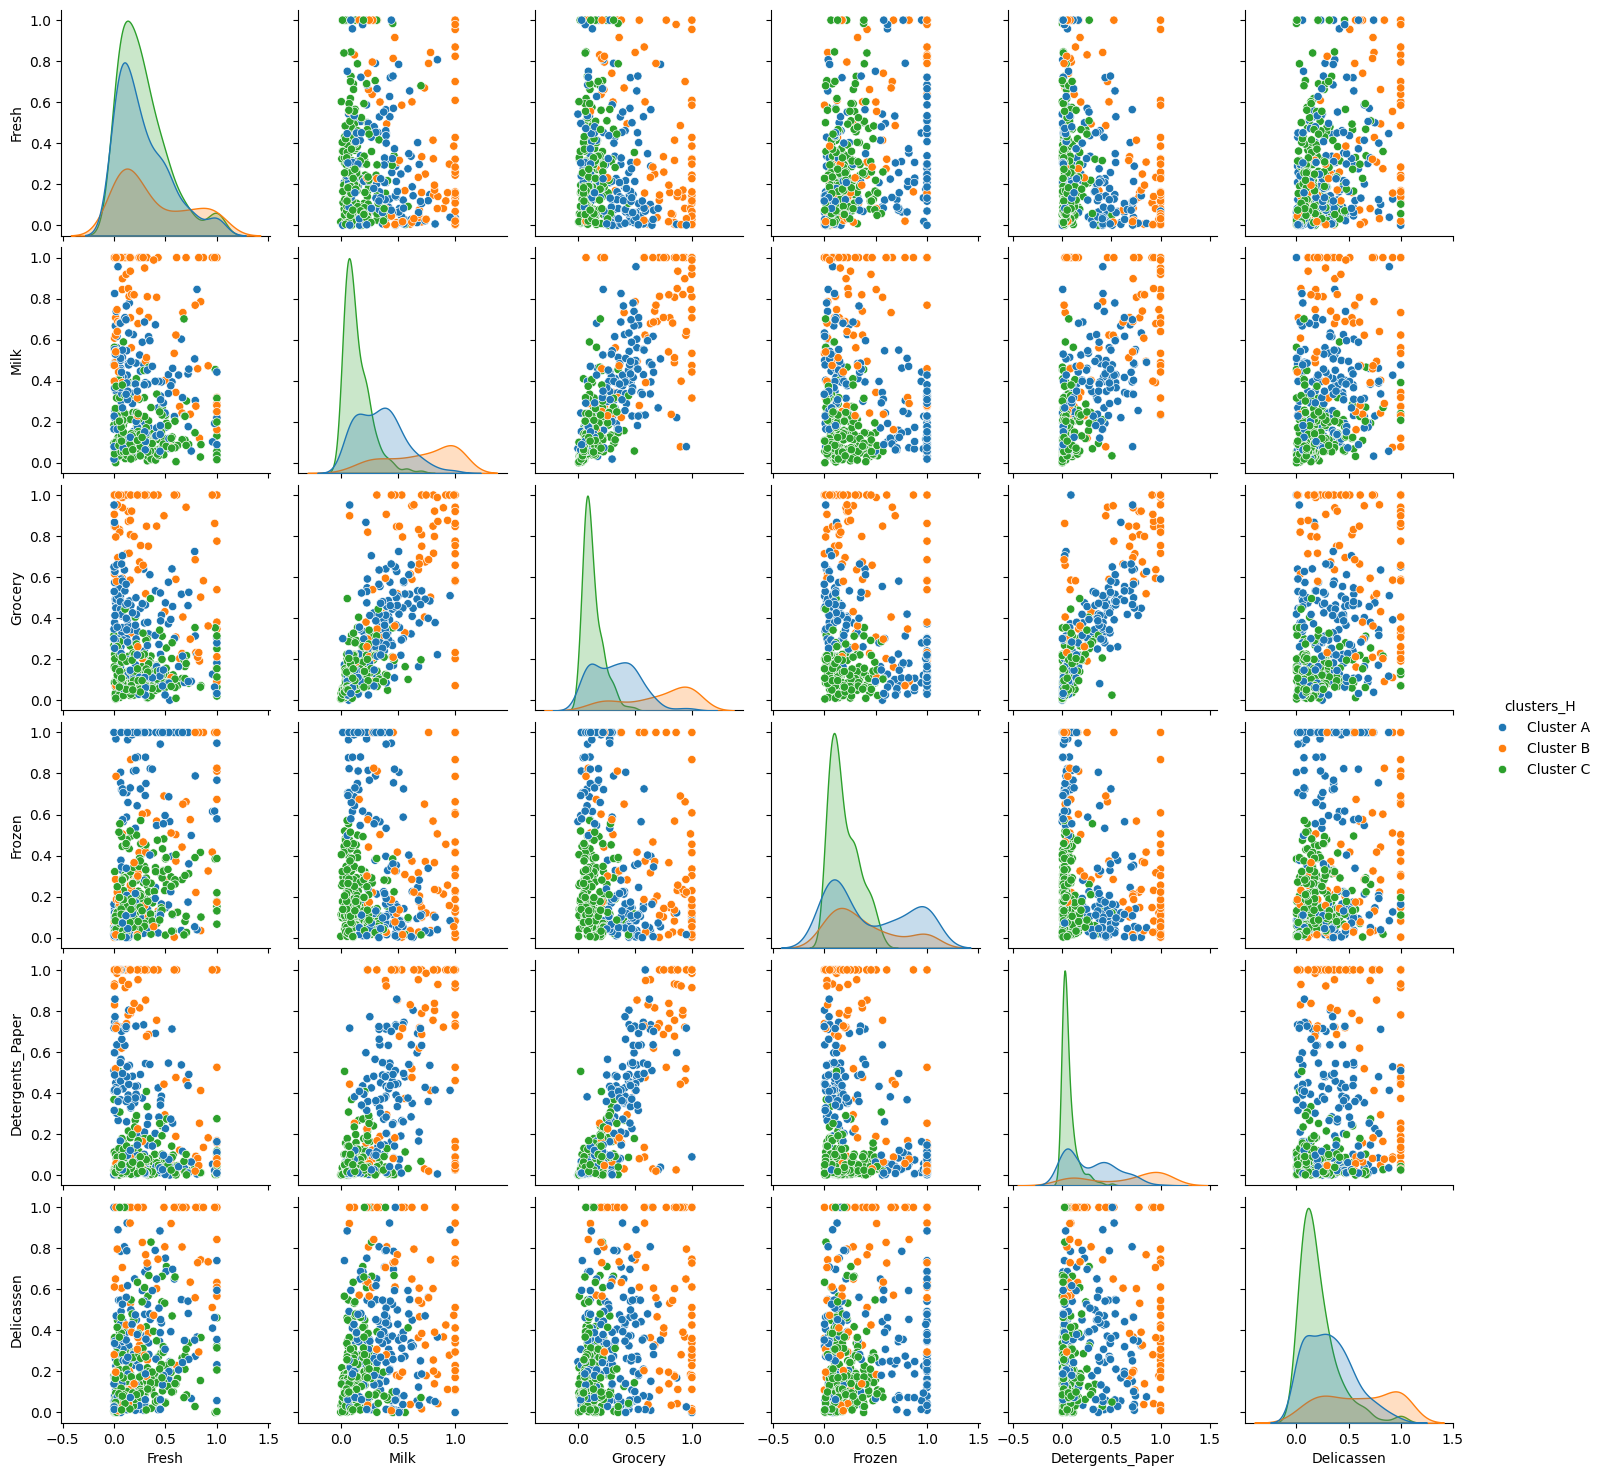

In [206]:
sns.pairplot(df_scaled.drop(columns=['cluster']),kind='scatter',hue='clusters_H',diag_kind='kde')
plt.show()

DBSCAN

import libraries

In [207]:
from sklearn.cluster import DBSCAN

In [208]:
df_scaled.drop(columns=['cluster','clusters_H'],inplace=True)

In [209]:
df_scaled

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0    0.336506  0.614616  0.322897  0.024396          0.283640    0.339241
1    0.187408  0.624475  0.408641  0.224209          0.349373    0.450543
2    0.168705  0.560331  0.328151  0.307206          0.373054    1.000000
3    0.352340  0.073042  0.180203  0.823389          0.053521    0.453593
4    0.600748  0.342805  0.307388  0.502114          0.188385    1.000000
..        ...       ...       ...       ...               ...         ...
435  0.789059  0.767934  0.684585  1.000000          0.019008    0.559304
436  1.000000  0.088086  0.032512  0.578915          0.009557    0.595388
437  0.385975  0.987957  1.000000  0.053180          1.000000    0.473667
438  0.273301  0.123295  0.095228  0.130756          0.017522    0.539229
439  0.073964  0.105178  0.107105  0.005163          0.050335    0.012452

[440 rows x 6 columns]

In [210]:
dbscan = DBSCAN(eps=0.5,min_samples=50).fit(df_scaled)
#prd = dbscan.fit_predict(df_scaled)

In [211]:
dbscan.labels_

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,
        0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0, -1, -1,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
       -1,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1, -1, -1,  0,
        0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,
        0,  0,  0,  0,  0

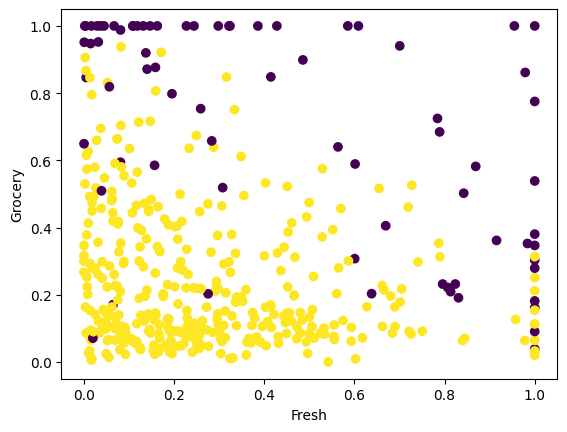

In [219]:
plt.scatter(df_scaled['Fresh'],df_scaled['Grocery'],c=dbscan.labels_)
plt.xlabel('Fresh')
plt.ylabel('Grocery')
plt.show()

In [213]:
df_scaled['kmeans_cluster'] = kmeans_clusters
df_scaled['clusters_H'] = clusters_H
df_scaled['dbscan_cluster'] = dbscan.labels_

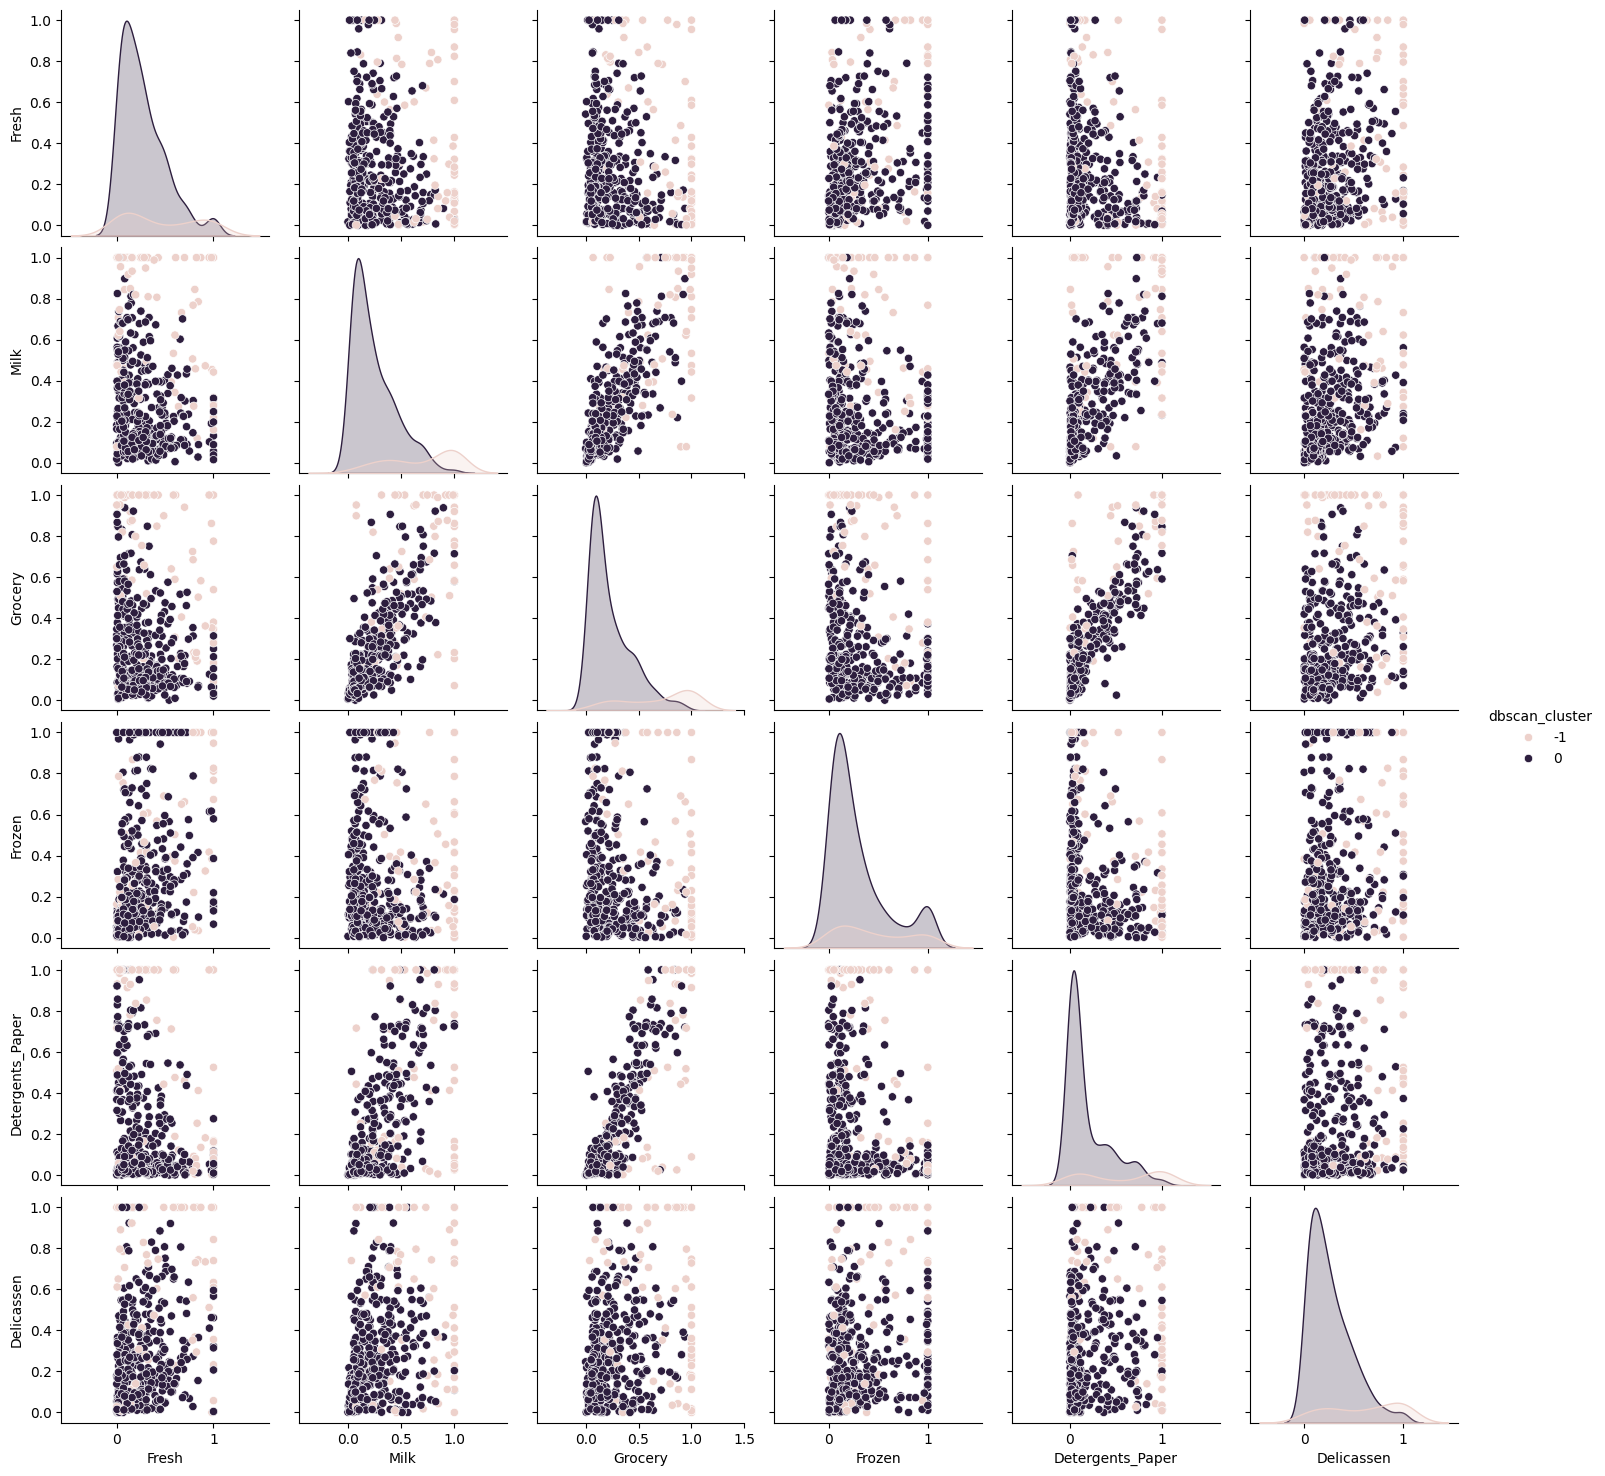

In [220]:
sns.pairplot(df_scaled.drop(columns=['kmeans_cluster','clusters_H']),kind='scatter',diag_kind='kde',hue='dbscan_cluster')
plt.show()

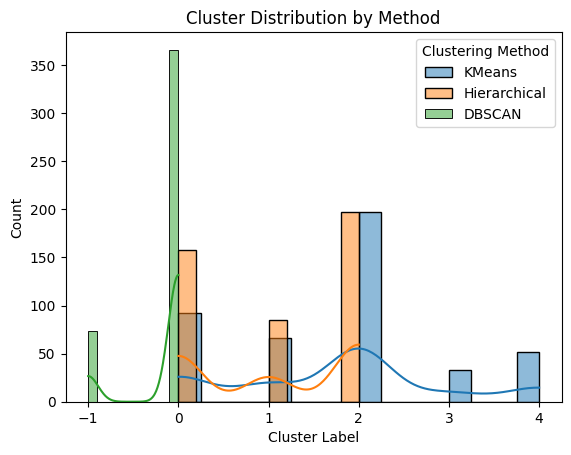

In [214]:
sns.histplot(data = df_scaled,x=df_scaled['kmeans_cluster'],kde=True,label='KMeans')
sns.histplot(data = df_scaled,x=df_scaled['clusters_H'],kde=True,label='Hierarchical')
sns.histplot(data = df_scaled,x=df_scaled['dbscan_cluster'],kde=True,label='DBSCAN')
plt.legend(title='Clustering Method')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.title('Cluster Distribution by Method')
plt.show()